In [1]:
import numpy as np
import pandas as pd
import random
import csv
import requests
headers = { 
    'accept': "application/json", 
    'apikey': "500bcdd275338226e8f70edc46214483" } 
cities_df = pd.read_csv("./ViolentCrime2017_selectedcities.csv")
cities_df 



,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants"
0,Virginia,Virginia Beach,"452,797",344,"4,798",0.00,75.97,0.01,1059.64
1,Hawaii,Honolulu,999307,1165,15535,0.00,116.58,0.02,1554.58
2,Kentucky,Lexington,314077,504,5982,0.00,160.47,0.02,1904.63
3,California,Anaheim,349471,620,5151,0.00,177.41,0.01,1473.94
4,Michigan,Detroit,673225,5409,13442,0.01,803.45,0.02,1996.66
5,Maryland,Baltimore,621252,5176,13822,0.01,833.16,0.02,2224.86
6,Tennessee,Memphis,"657,936","5,733","16,833",0.01,871.36,0.03,2558.46
7,Missouri,St. Louis,317095,2781,8522,0.01,877.02,0.03,2687.52


In [2]:

base_url ="https://search.onboard-apis.com/areaapi/v2.0.0/state/lookup"
res = requests.get(base_url,headers=headers).json()
res
st_data =pd.DataFrame(res['response']['result']['package']['item'])
st_data.rename(columns={'name':'State','geo_key':'St_geo_key'}, inplace=True)
statedata = st_data[['State','St_geo_key','abbreviation']]
city_table =pd.merge(cities_df, statedata, on="State", how="left")
city_table 

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation
0,Virginia,Virginia Beach,"452,797",344,"4,798",0.00,75.97,0.01,1059.64,ST51,VA
1,Hawaii,Honolulu,999307,1165,15535,0.00,116.58,0.02,1554.58,ST15,HI
2,Kentucky,Lexington,314077,504,5982,0.00,160.47,0.02,1904.63,ST21,KY
3,California,Anaheim,349471,620,5151,0.00,177.41,0.01,1473.94,ST06,CA
4,Michigan,Detroit,673225,5409,13442,0.01,803.45,0.02,1996.66,ST26,MI
5,Maryland,Baltimore,621252,5176,13822,0.01,833.16,0.02,2224.86,ST24,MD
6,Tennessee,Memphis,"657,936","5,733","16,833",0.01,871.36,0.03,2558.46,ST47,TN
7,Missouri,St. Louis,317095,2781,8522,0.01,877.02,0.03,2687.52,ST29,MO


In [4]:
appended_new = pd.DataFrame([])
for index, row in city_table.iterrows():
    stgc = row['St_geo_key']
    city = row['City']  
    city_url ="https://search.onboard-apis.com/areaapi/v2.0.0/geoid/lookup/?geoId="+stgc+"&GeoType=PL" 
    
    resc = requests.get(city_url,headers=headers).json()
    city_data = pd.DataFrame(resc['response']['result']['package']['item'])
    
    new = city_data.loc[city_data['name'] == city]      
    appended_new = appended_new.append(new)
    
appended_new

    

,area,area_unit,geo_key,id,name,type
592,497.496,sq. mi.,PL5182000,5182000,Virginia Beach,PL
1482,50.9247,sq. mi.,PL0602000,0602000,Anaheim,PL
691,142.875,sq. mi.,PL2622000,2622000,Detroit,PL
517,92.0506,sq. mi.,PL2404000,2404000,Baltimore,PL
427,326.326,sq. mi.,PL4748000,4748000,Memphis,PL
1027,66.0719,sq. mi.,PL2965000,2965000,St. Louis,PL


In [5]:
city_table1 =pd.merge(city_table, appended_new, left_on=['City'], right_on=['name'])
city_table1 

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,area,area_unit,geo_key,id,name,type
0,Virginia,Virginia Beach,"452,797",344,"4,798",0.00,75.97,0.01,1059.64,ST51,VA,497.496,sq. mi.,PL5182000,5182000,Virginia Beach,PL
1,California,Anaheim,349471,620,5151,0.00,177.41,0.01,1473.94,ST06,CA,50.9247,sq. mi.,PL0602000,0602000,Anaheim,PL
2,Michigan,Detroit,673225,5409,13442,0.01,803.45,0.02,1996.66,ST26,MI,142.875,sq. mi.,PL2622000,2622000,Detroit,PL
3,Maryland,Baltimore,621252,5176,13822,0.01,833.16,0.02,2224.86,ST24,MD,92.0506,sq. mi.,PL2404000,2404000,Baltimore,PL
4,Tennessee,Memphis,"657,936","5,733","16,833",0.01,871.36,0.03,2558.46,ST47,TN,326.326,sq. mi.,PL4748000,4748000,Memphis,PL
5,Missouri,St. Louis,317095,2781,8522,0.01,877.02,0.03,2687.52,ST29,MO,66.0719,sq. mi.,PL2965000,2965000,St. Louis,PL


In [8]:
appended_main = pd.DataFrame([])

for index, row in city_table1.iterrows():
    cgc = row['geo_key']
  
    base_url="https://search.onboard-apis.com/communityapi/v2.0.0/area/full?AreaId="+cgc
    
    resct = requests.get( base_url,headers=headers).json()
    city_data2 = pd.DataFrame(resct['response']['result']['package']['item'])
    appended_main = appended_main.append(city_data2)
 
    #appended_new = appended_new.append(new)
    
# cocrmcyasst : Assault Risk (County)
# cocrmcytotc : Total Crime Risk (County)
crime = appended_main[['name','latitude','geo_key','longitude','cocrmcyasst','cocrmcytotc']]
crime

,name,latitude,geo_key,longitude,cocrmcyasst,cocrmcytotc
0,Virginia Beach,36.820655,PL5182000,-76.099708,27,71
0,Anaheim,33.833198,PL0602000,-117.906782,49,55
0,Detroit,42.388561,PL2622000,-83.112219,224,188
0,Baltimore,39.314540,PL2404000,-76.618976,311,272
0,Memphis,35.119649,PL4748000,-89.936550,256,238
0,St. Louis,38.622868,PL2965000,-90.252804,571,475


         area area_unit    geo_key       id            name type
592   497.496   sq. mi.  PL5182000  5182000  Virginia Beach   PL
1482  50.9247   sq. mi.  PL0602000  0602000         Anaheim   PL
691   142.875   sq. mi.  PL2622000  2622000         Detroit   PL
517   92.0506   sq. mi.  PL2404000  2404000       Baltimore   PL
427   326.326   sq. mi.  PL4748000  4748000         Memphis   PL
1027  66.0719   sq. mi.  PL2965000  2965000       St. Louis   PL


In [108]:
schools = pd.DataFrame(columns=['city_name','latitude','longitude','geo_key','cocrmcyasst','cocrmcytotc','school_id'])
schoolCount = 0
for index, row in crime.iterrows():
    lat = row['latitude']
    lng = row['longitude']  
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/snapshot?latitude="+lat+"&longitude="+lng+"&radius=50&filetypetext=public"
    resch = requests.get(sch_url,headers=headers).json()
    for a_school in resch['school']:
        schools.loc[schoolCount] = [row['name'],row['latitude'], row['longitude'],row['geo_key'],row['cocrmcyasst'],row['cocrmcytotc'],a_school['Identifier']['OBInstID'] ]
        schoolCount += 1

    
    #     sch_data = pd.DataFrame(resch['response']['result']['package']['item'])  
#     schools = schools.append(sch_data)
schools.head(15)

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097
4,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,5700098812
5,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01882136
6,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089188
7,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089384
8,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01399907
9,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,02131368


In [112]:
for index, row in schools.iterrows():
    city_name = row['city_name']
    school_id = row['school_id']         
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/detail?id="+school_id
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = requests.get(sch_url,headers=headers).json()
            row['studentteacherratio'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher']
            print(resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher'])
        else:
            print("School not found. Skipping...")
    except:         
        print("Unknown exception...")
        pass
schools.head()

15
17
14
18
Not Reported
19
Unknown exception...
16
14
12
Not Reported
Not Reported
24
24
20
25
26
24
25
Unknown exception...
27
17
8
9
8
14
19
8
17
Not Reported
14
13
13
17
20
15
17
16
18
12
12
Not Reported
Not Reported
17
14
21
15
19
17
15
12
12
11
19
20
15
14
Not Reported
13
11


,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528,15
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530,17
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308,14
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097,18
4,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,5700098812,Not Reported


In [116]:
#remove data when student teacher ratio is not reported
schools_data = schools
schools_data2 = schools_data.loc[schools_data['studentteacherratio'] != 'Not Reported', :] 
schools_data2.head()

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528,15
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530,17
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308,14
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097,18
5,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01882136,19


In [132]:
#convert student teacher ratio column data to integer
schools_data2['studentteacherratio'] = schools_data2['studentteacherratio'].astype(str).astype(int)
schools_data2['cocrmcyasst'] = schools_data2['cocrmcyasst'].astype(str).astype(int)
schools_data2['cocrmcytotc'] = schools_data2['cocrmcytotc'].astype(str).astype(int)

schools_data2.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528,15
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530,17
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308,14
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097,18
5,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01882136,19


In [133]:
# calculate average student teacher ratio for each city
schools_city = schools_data2.groupby(['city_name'])['cocrmcyasst','cocrmcytotc','studentteacherratio'].mean()
schools_city.head()

,cocrmcyasst,cocrmcytotc,studentteacherratio
city_name,,,
Anaheim,49.0,55.0,22.375000
Baltimore,311.0,272.0,15.500000
Detroit,224.0,188.0,14.111111
Memphis,256.0,238.0,16.250000
St. Louis,571.0,475.0,14.111111


Text(0.5, 1.0, 'Student/Teacher Ratio vs. Total Crime Risk (County)')

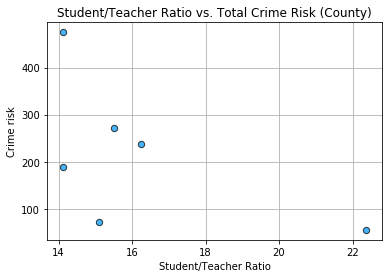

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt

# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
plt.scatter(schools_city['studentteacherratio'], schools_city['cocrmcytotc'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Crime risk')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")

In [ ]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst